In [2]:
import os
import sys
import random
import platform
import warnings
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore")

In [3]:
SEED = 42  
os.environ["PYTHONHASHSEED"] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)

In [5]:
df = pd.read_csv(r"C:\Users\niish\Downloads\climate_nasa.csv")

In [6]:
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())

Dataset Shape: (522, 5)

Columns: ['date', 'likesCount', 'profileName', 'commentsCount', 'text']

First 5 rows:
                       date  likesCount  \
0  2022-09-07T17:12:32.000Z           2   
1  2022-09-08T14:51:13.000Z           0   
2  2022-09-07T17:19:41.000Z           1   
3  2022-09-08T00:51:30.000Z           4   
4  2022-09-07T19:06:20.000Z          16   

                                         profileName  commentsCount  \
0  4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...            NaN   
1  518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...            NaN   
2  d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...            3.0   
3  37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...            NaN   
4  e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...           26.0   

                                                text  
0  Neat comparison I have not heard it before.\n ...  
1  An excellent way to visualise the invisible! T...  
2  Does the CO2/ghg in the tropospher

In [7]:
print("Missing values before cleaning:\n", df.isnull().sum())

Missing values before cleaning:
 date               0
likesCount         0
profileName        0
commentsCount    278
text              18
dtype: int64


In [8]:
df["commentsCount"].fillna(0, inplace=True)

In [9]:
df["text"].fillna("No Text", inplace=True)

In [10]:
df["commentsCount"].fillna(0, inplace=True)
df["text"].fillna("No Text", inplace=True)
print("Missing values after cleaning:\n", df.isnull().sum())

Missing values after cleaning:
 date             0
likesCount       0
profileName      0
commentsCount    0
text             0
dtype: int64


In [11]:
y = df["commentsCount"]
X = df.drop(columns=["commentsCount"])

In [12]:
X["date"] = pd.to_datetime(X["date"])
X["year"] = X["date"].dt.year
X["month"] = X["date"].dt.month
X["day"] = X["date"].dt.day
X = X.drop(columns=["date"])

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X["profileName"] = le.fit_transform(X["profileName"].astype(str))

In [14]:
X["text_length"] = X["text"].apply(lambda x: len(str(x)))
X = X.drop(columns=["text"])

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("\nFeatures used:", X.columns.tolist())

Train shape: (417, 6) Test shape: (105, 6)

Features used: ['likesCount', 'profileName', 'year', 'month', 'day', 'text_length']


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Scaled Training Features (first 5 rows):")
print(X_train_scaled.head())

Scaled Training Features (first 5 rows):
     likesCount  profileName      year     month       day  text_length
220   -0.328128     0.604488  0.580362  0.160008  1.220976    -0.227799
69    -0.413808    -0.298433  1.473392 -1.441350 -0.756294    -0.317141
374   -0.413808    -0.696572  1.473392  1.227580 -0.332593    -0.322396
305   -0.413808     1.429203 -1.205697 -0.373778 -0.191360    -0.035103
173    1.985208    -0.113583 -1.205697 -0.373778 -0.332593    -0.061380


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred_lr = lin_reg.predict(X_test_scaled)

print("🔹 Linear Regression Results")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R² Score:", r2_score(y_test, y_pred_lr))
print("="*50)
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train)

y_pred_rf = rf_reg.predict(X_test_scaled)

print("🔹 Random Forest Results")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R² Score:", r2_score(y_test, y_pred_rf))

🔹 Linear Regression Results
MSE: 44.369844183531676
RMSE: 6.661069297307428
R² Score: 0.10272947826158363
🔹 Random Forest Results
MSE: 49.67207523809524
RMSE: 7.047841885151457
R² Score: -0.0044950502949463456


In [19]:
# Make predictions on the test set
y_pred_lr = lin_reg.predict(X_test_scaled)   
y_pred_rf = rf_reg.predict(X_test_scaled)    

print("Linear Regression Predictions (first 10):")
print(y_pred_lr[:10])

print("\nRandom Forest Predictions (first 10):")
print(y_pred_rf[:10])

Linear Regression Predictions (first 10):
[5.95739754 3.02109735 5.61771603 2.01656012 2.78415964 2.61642912
 7.16352773 2.30743201 2.87793453 2.38077546]

Random Forest Predictions (first 10):
[ 7.75  2.51 10.84  1.52  2.63  2.8  18.64  0.18  2.15  5.1 ]


In [20]:
# Compare with actual values
print("\nActual y values (first 10):")
print(y_test[:10].values)


Actual y values (first 10):
[0. 4. 0. 5. 0. 0. 1. 0. 0. 1.]


In [21]:
y_pred_lr = lin_reg.predict(X_test_scaled)
y_pred_rf = rf_reg.predict(X_test_scaled)

plt.figure(figsize=(14,6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

Text(0.5, 1.0, 'Linear Regression: Actual vs Predicted')

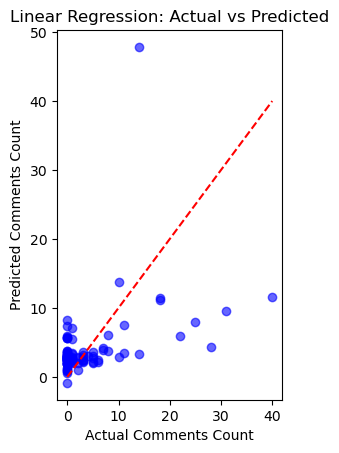

In [22]:
#  Linear Regression
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_lr, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel("Actual Comments Count")
plt.ylabel("Predicted Comments Count")
plt.title("Linear Regression: Actual vs Predicted")

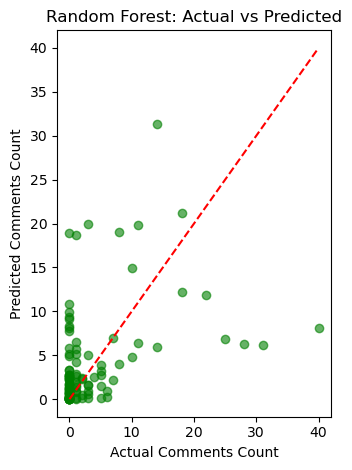

In [33]:
#Random Forest 
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_rf, color="green", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel("Actual Comments Count")
plt.ylabel("Predicted Comments Count")
plt.title("Random Forest: Actual vs Predicted")

plt.tight_layout()
plt.show()

In [ ]:
# Example: Future projection for a new post
future_data = pd.DataFrame({
    "likesCount": [1200],        
    "profileName": ["NASA"], 
    "text": ["Climate change awareness post coming soon!"],
    "date": ["2025-09-01"]      
})

# Preprocess 
future_data["date"] = pd.to_datetime(future_data["date"])
future_data["year"] = future_data["date"].dt.year
future_data["month"] = future_data["date"].dt.month
future_data["day"] = future_data["date"].dt.day
future_data = future_data.drop(columns=["date"])

future_data["profileName"] = le.transform(future_data["profileName"].astype(str))

future_data["text_length"] = future_data["text"].apply(len)
future_data = future_data.drop(columns=["text"])

future_scaled = scaler.transform(future_data)

# Predictions
future_pred_lr = lin_reg.predict(future_scaled)
future_pred_rf = rf_reg.predict(future_scaled)

print(" Future Projection")
print("Linear Regression Prediction:", future_pred_lr[0])
print("Random Forest Prediction:", future_pred_rf[0])

In [23]:
from sklearn.preprocessing import LabelEncoder

# Data cleaning and preprocessing based on the notebook content
df["commentsCount"].fillna(0, inplace=True)
df["text"].fillna("No Text", inplace=True)
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df["text_length"] = df["text"].apply(lambda x: len(str(x)))

# Label encode 'profileName'
le = LabelEncoder()
df["profileName_encoded"] = le.fit_transform(df["profileName"].astype(str))

# Select numerical columns for the correlation heatmap
numeric_df = df[['likesCount', 'commentsCount', 'year', 'month', 'day', 'text_length', 'profileName_encoded']]

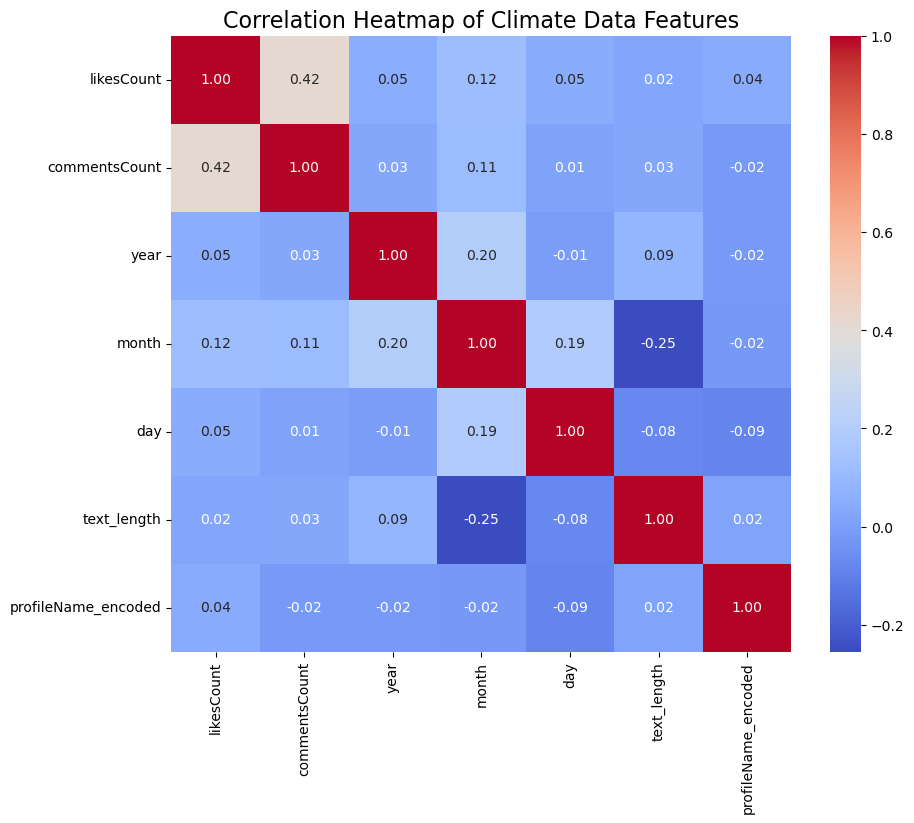

In [24]:
# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Climate Data Features", fontsize=16)
plt.savefig("correlation_heatmap.png")
plt.show()